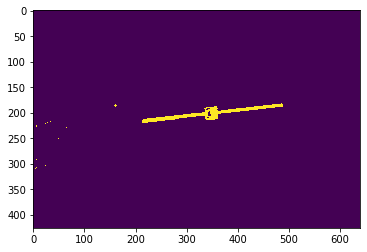

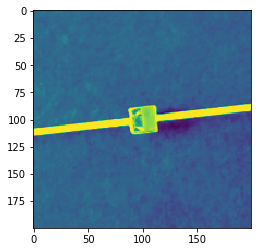

[[<DMatch 0x11a4a2870>, <DMatch 0x11a4d4d90>], [<DMatch 0x11a4d4210>, <DMatch 0x11a4d4c50>], [<DMatch 0x11a4d4df0>, <DMatch 0x11a4d4110>], [<DMatch 0x11a4d48d0>, <DMatch 0x11a4d4a90>], [<DMatch 0x11a4d4270>, <DMatch 0x11a4d4130>], [<DMatch 0x119e55d90>, <DMatch 0x119e55c50>], [<DMatch 0x119e55d10>, <DMatch 0x119e55470>], [<DMatch 0x119e55a30>, <DMatch 0x119e55b30>], [<DMatch 0x119e55ab0>, <DMatch 0x119e55410>], [<DMatch 0x119e55530>, <DMatch 0x119e55950>], [<DMatch 0x119e55b50>, <DMatch 0x119e55850>], [<DMatch 0x119e55cf0>, <DMatch 0x11a4f45b0>], [<DMatch 0x11a4f4690>, <DMatch 0x11a4f46b0>], [<DMatch 0x11a4f46d0>, <DMatch 0x11a4f46f0>], [<DMatch 0x11a4f4710>, <DMatch 0x11a4f4730>], [<DMatch 0x11a4f4750>, <DMatch 0x11a4f4770>], [<DMatch 0x11a4f4790>, <DMatch 0x11a4f47b0>], [<DMatch 0x11a4f47d0>, <DMatch 0x11a4f47f0>], [<DMatch 0x11a4f4810>, <DMatch 0x11a4f4830>], [<DMatch 0x11a4f4850>, <DMatch 0x11a4f4870>], [<DMatch 0x11a4f4890>, <DMatch 0x11a4f48b0>], [<DMatch 0x11a4f48d0>, <DMatch 0x

In [ ]:
import cv2
#import led_camera
import matplotlib.pyplot as plt
import numpy as np
thresh = 200
max_pixel = 255

size = 100

smp = cv2.imread("./red_sita/1.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.imread("./pic1.jpg", cv2.IMREAD_GRAYSCALE)

#hsv = cv2.cvtColor(smp, cv2.COLOR_BGR2HSV_FULL)
#gry_img = hsv[:,:,2]
#gry_img = cv2.cvtColor(cp_img,cv2.COLOR_BGR2GRAY)
ret,new_img = cv2.threshold(smp,thresh,max_pixel,cv2.THRESH_BINARY)
plt.imshow(new_img)
plt.show()
contours, hierarchy = cv2.findContours(
                new_img,
                cv2.RETR_TREE, 
                cv2.CHAIN_APPROX_NONE
                )

max_cnt = max(contours, key=lambda x: cv2.contourArea(x))

M = cv2.moments(max_cnt)
cx = int(M["m10"]/M["m00"])
cy = int(M["m01"]/M["m00"])

x0 = cx - size
x1 = cx + size
y0 = cy - size
y1 = cy + size

cut = smp[y0:y1,x0:x1]
plt.imshow(cut)
plt.show()

akaze = cv2.AKAZE_create()
kp1, des1 = akaze.detectAndCompute(cut,None)
kp2, des2 = akaze.detectAndCompute(img,None)

#print(kp1)
#print(des1)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

print(matches)

ratio = 0.9
good = []
for m, n in matches:
    if m.distance < ratio * n.distance:
        good.append([m])
        
img3 = cv2.drawMatchesKnn(cut, kp1, img, kp2, good, None, flags=0)

cv2.imshow('img',img3)

cv2.waitKey(0)
cv2.destroyAllWindows()

